### Sobre o notebook

Esse notebook contém diversos desafios envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada desafio e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para solucionar o desafio, fique à vontade para acrescentar.

### Desafio 1:

A primeira etapa em um projeto de machine learning é a obtenção de dados. A partir dessa obtenção, podemos fazer a leitura dos dados para se construir um modelo. Como tarefa inicial, faça a leitura da base de dados e verifique a presença de dados nulos.

In [3]:
import pandas as pd

# Leitura da base de dados
df = pd.read_csv('churn.csv')

In [4]:
# Exibir as primeiras linhas do dataframe
print("Primeiras linhas da base de dados:")
print(df.head())

Primeiras linhas da base de dados:
   id_cliente  score_credito     pais sexo_biologico  idade  anos_de_cliente  \
0    15634602            619   França         Mulher     42                2   
1    15647311            608  Espanha         Mulher     41                1   
2    15619304            502   França         Mulher     42                8   
3    15701354            699   França         Mulher     39                1   
4    15737888            850  Espanha         Mulher     43                2   

       saldo  servicos_adquiridos  tem_cartao_credito  membro_ativo  \
0       0.00                    1                   1             1   
1   83807.86                    1                   0             1   
2  159660.80                    3                   1             0   
3       0.00                    2                   0             0   
4  125510.82                    1                   1             1   

   salario_estimado  churn  
0         101348.88      1  

In [5]:
# Verificação da presença de dados nulos
dados_nulos = df.isnull().sum()

print("\nQuantidade de dados nulos por coluna:")
print(dados_nulos)


Quantidade de dados nulos por coluna:
id_cliente             0
score_credito          0
pais                   0
sexo_biologico         0
idade                  0
anos_de_cliente        0
saldo                  0
servicos_adquiridos    0
tem_cartao_credito     0
membro_ativo           0
salario_estimado       0
churn                  0
dtype: int64


### Desafio 2

Após a leitura dos dados, é importante conhecer os dados, checando inconsistências e entendendo o comportamento de cada uma das colunas. Nesta tarefa, faça uma análise exploratória utilizando gráficos para as **variáveis categóricas** da base de dados, incluindo a **variável alvo** churn. Para essas variáveis, pode ser utilizado gráficos de barras para fazer a contagem das categorias e fazer um agrupamento por cores de acordo com as categorias da variável alvo.

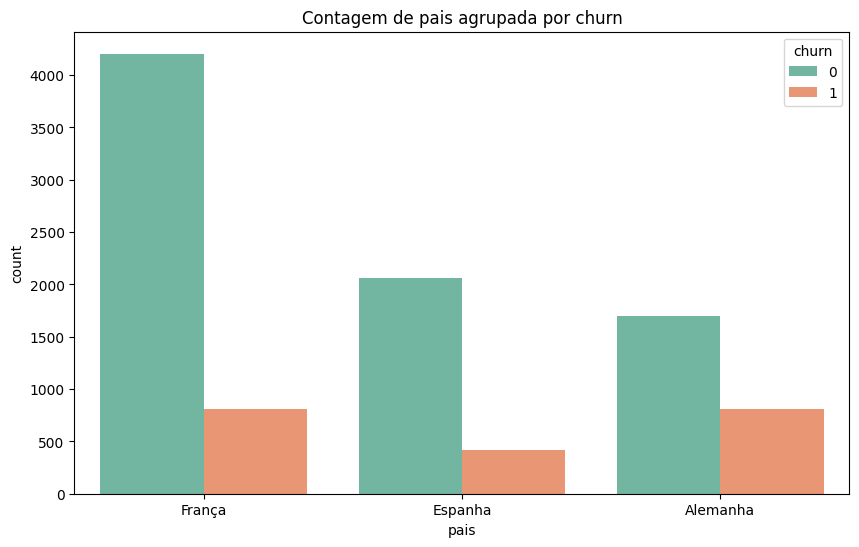

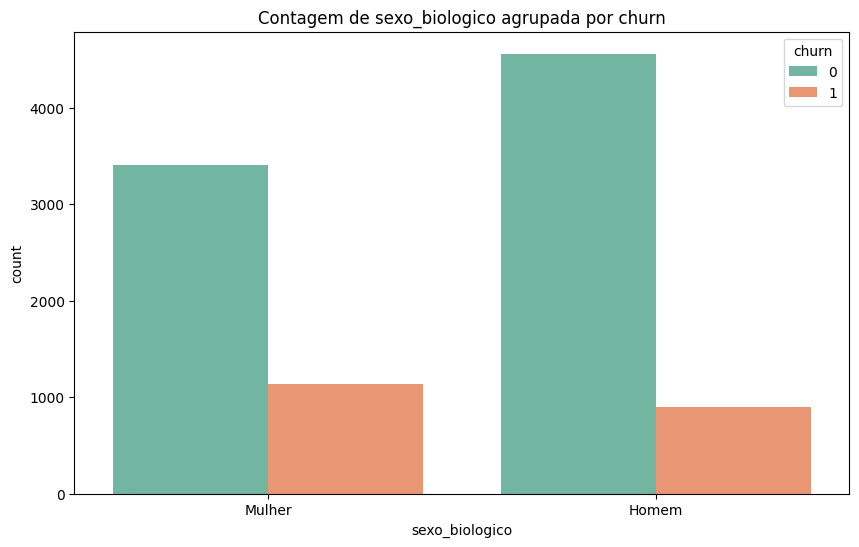

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Identificar variáveis categóricas
variaveis_categoricas = df.select_dtypes(include=['object']).columns.tolist()

# Remover a variável alvo da lista de variáveis categóricas, se presente
if 'churn' in variaveis_categoricas:
    variaveis_categoricas.remove('churn')

# Criar gráficos de barras para cada variável categórica
for var in variaveis_categoricas:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=var, hue='churn', palette='Set2')
    plt.title(f'Contagem de {var} agrupada por churn')
    plt.show()


### Desafio 3

Depois de explorar as variáveis categóricas, chegou a vez das **variáveis numéricas**. Construa gráficos de distribuição como boxplots ou histogramas para analisar o comportamento dos valores numéricos e checar se existem valores inconsistentes.

In [14]:
#Identificar variáveis numéricas
variaveis_numericas = df.select_dtypes(include=['number']).columns.tolist()

print("\nVariáveis numéricas identificadas:")
print(variaveis_numericas)



Variáveis numéricas identificadas:
['id_cliente', 'score_credito', 'idade', 'anos_de_cliente', 'saldo', 'servicos_adquiridos', 'tem_cartao_credito', 'membro_ativo', 'salario_estimado', 'churn']


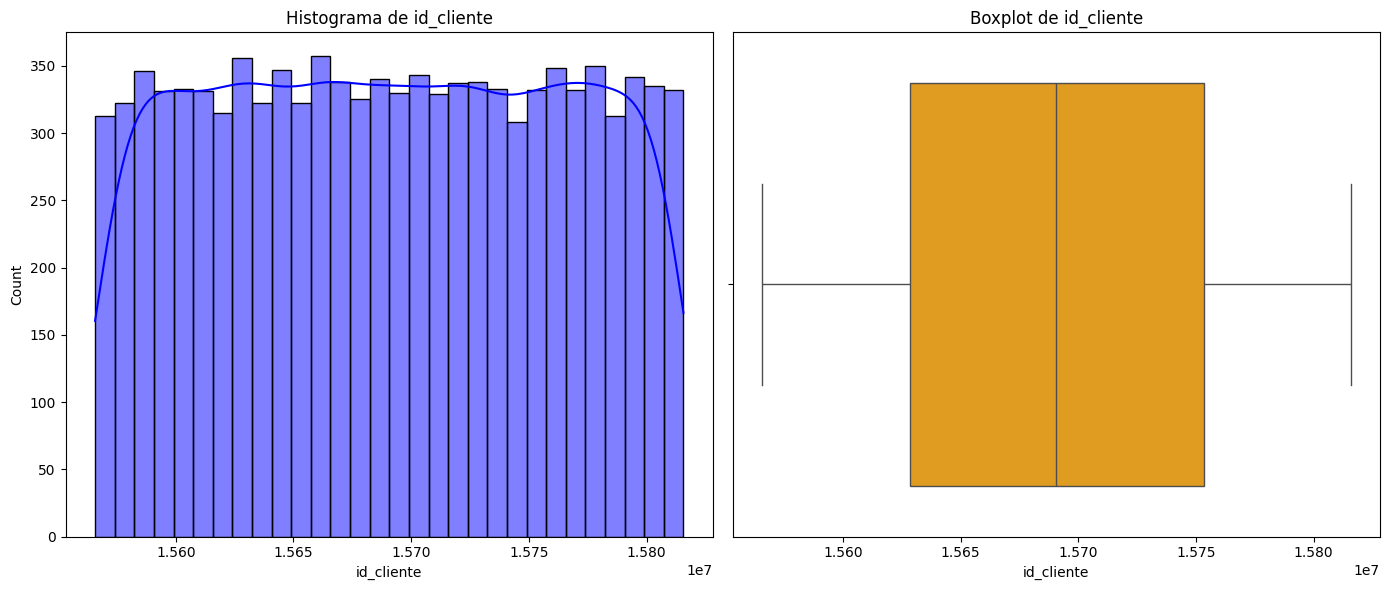

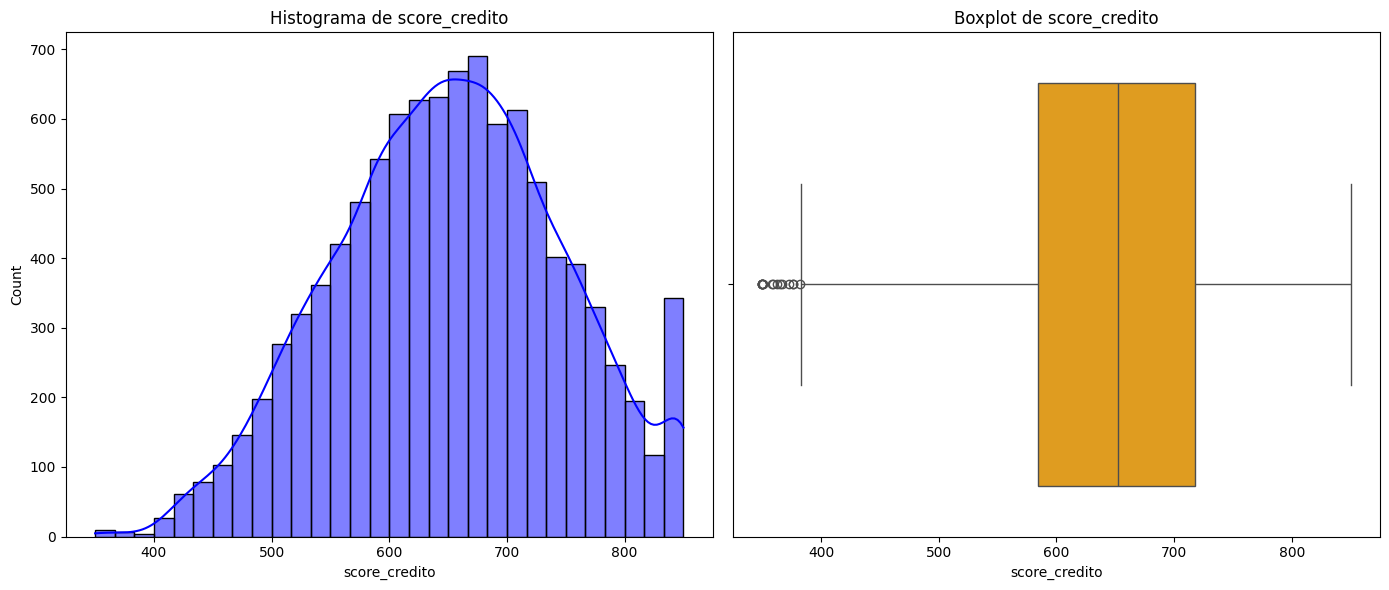

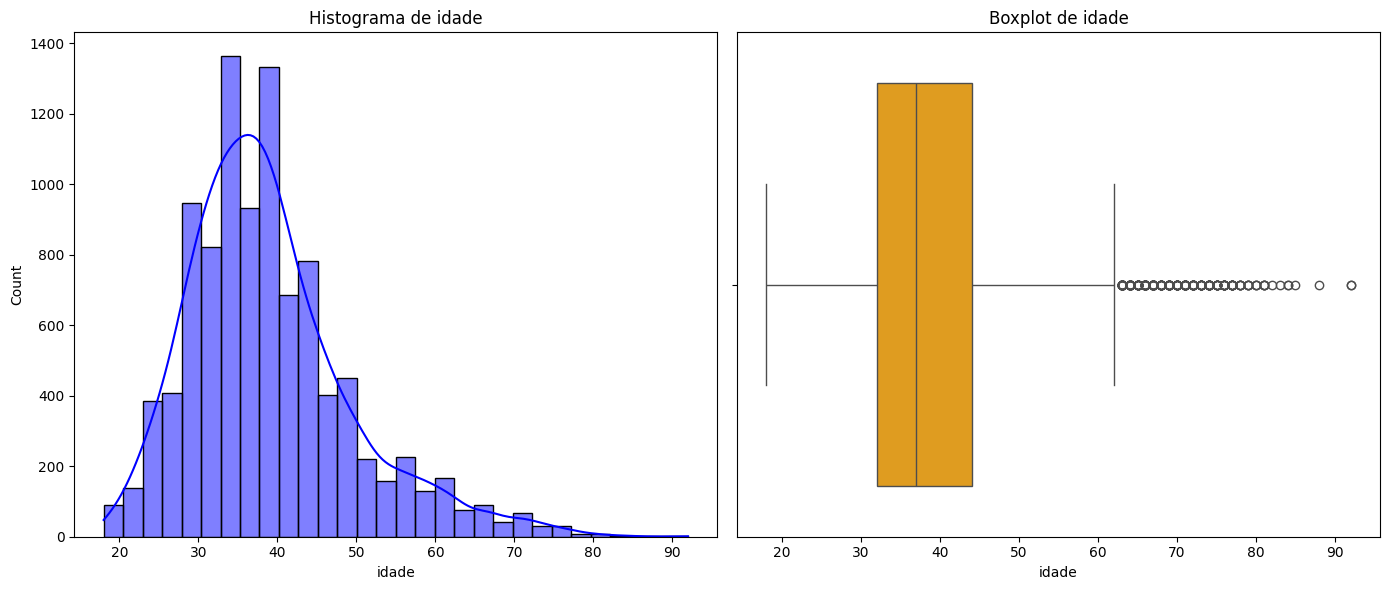

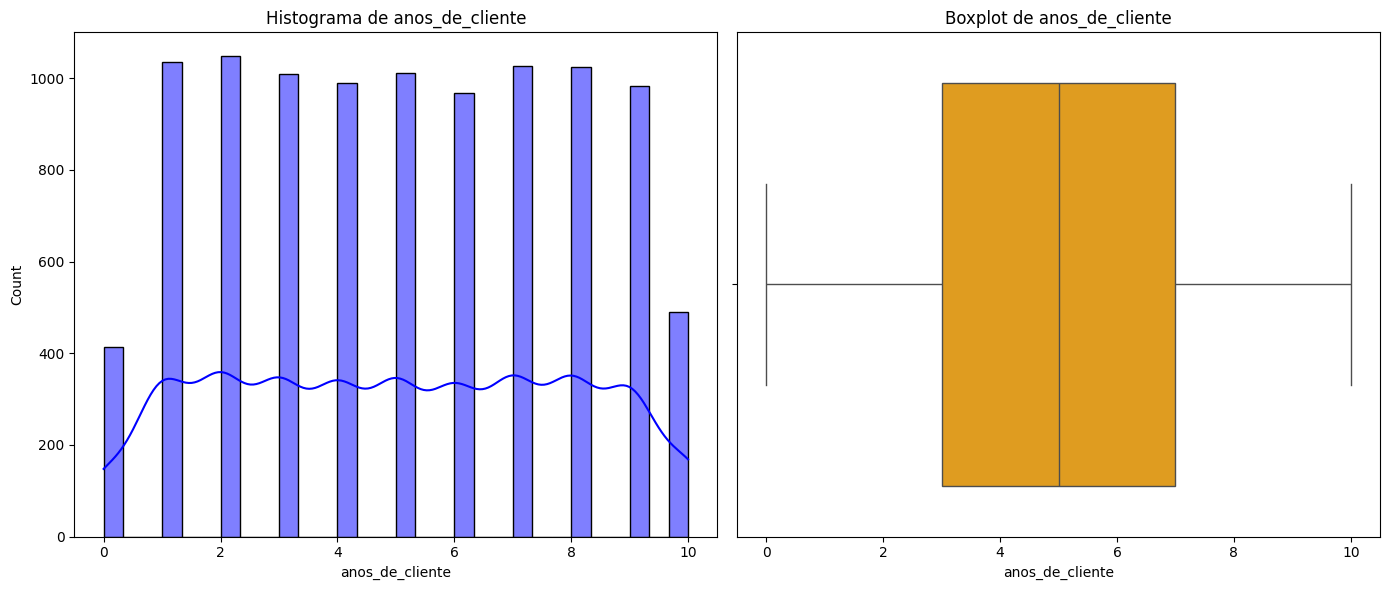

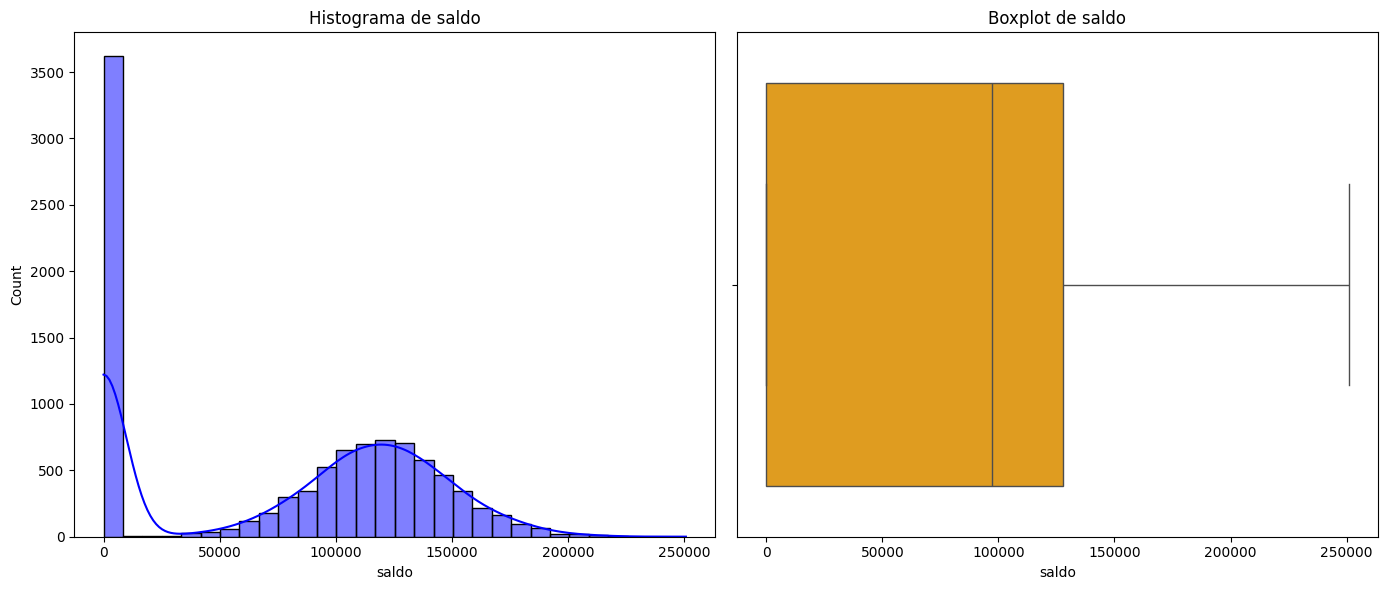

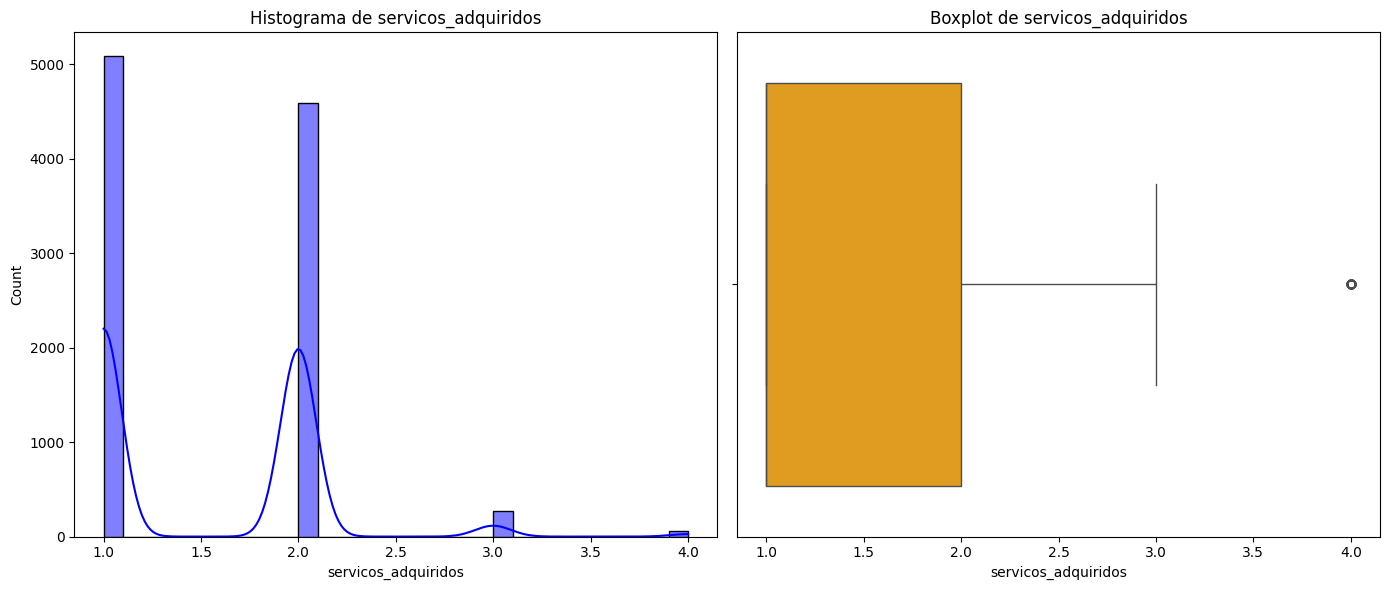

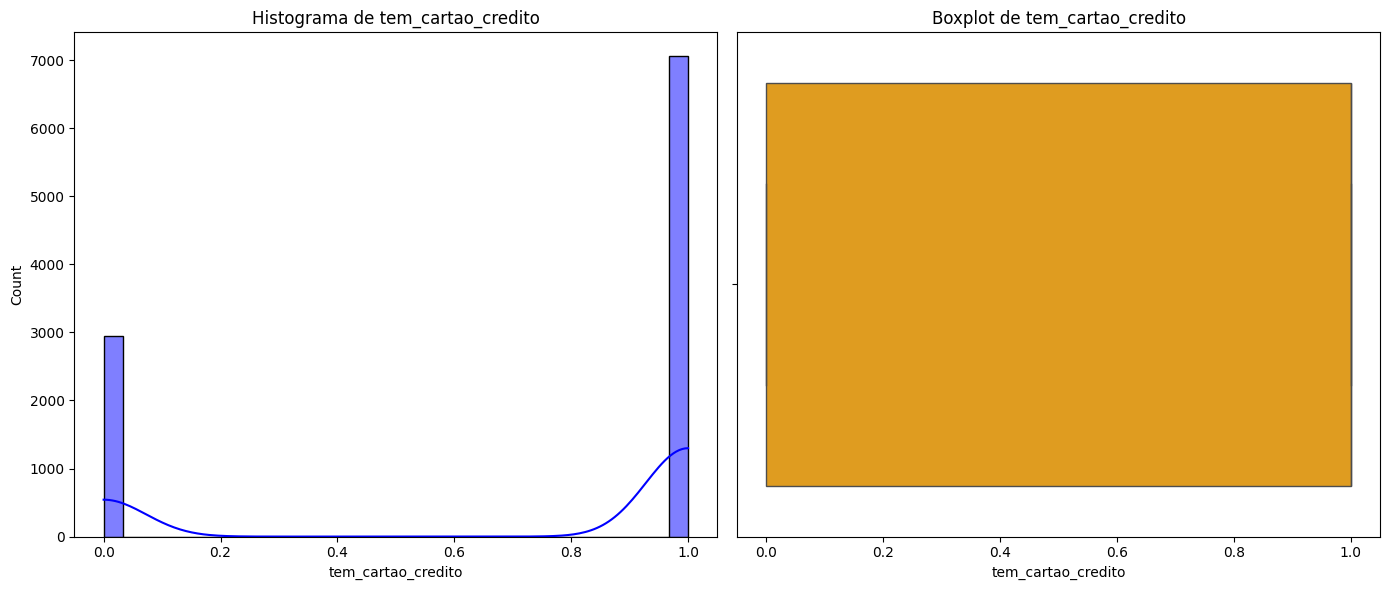

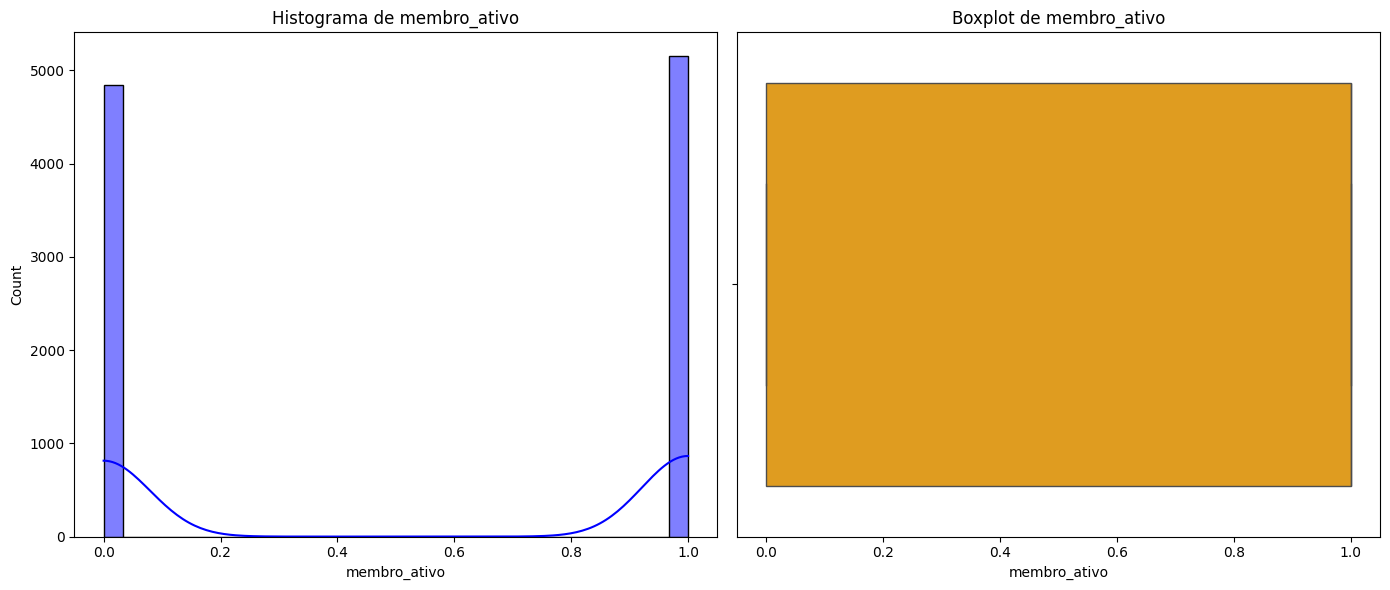

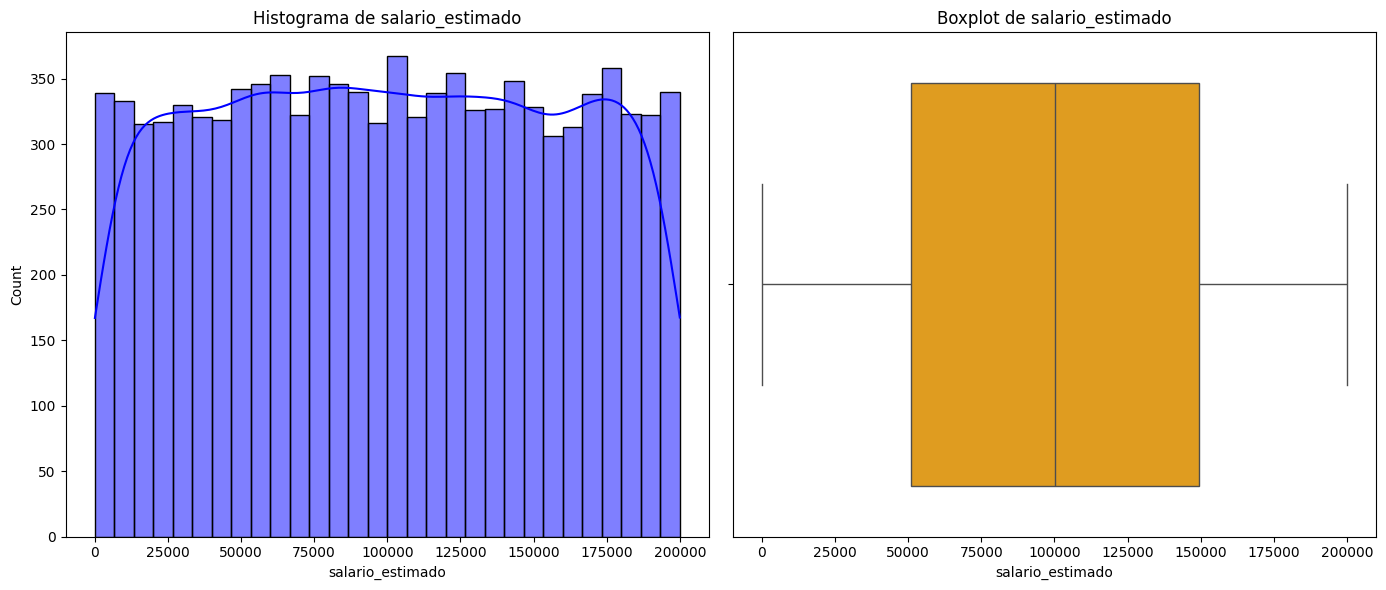

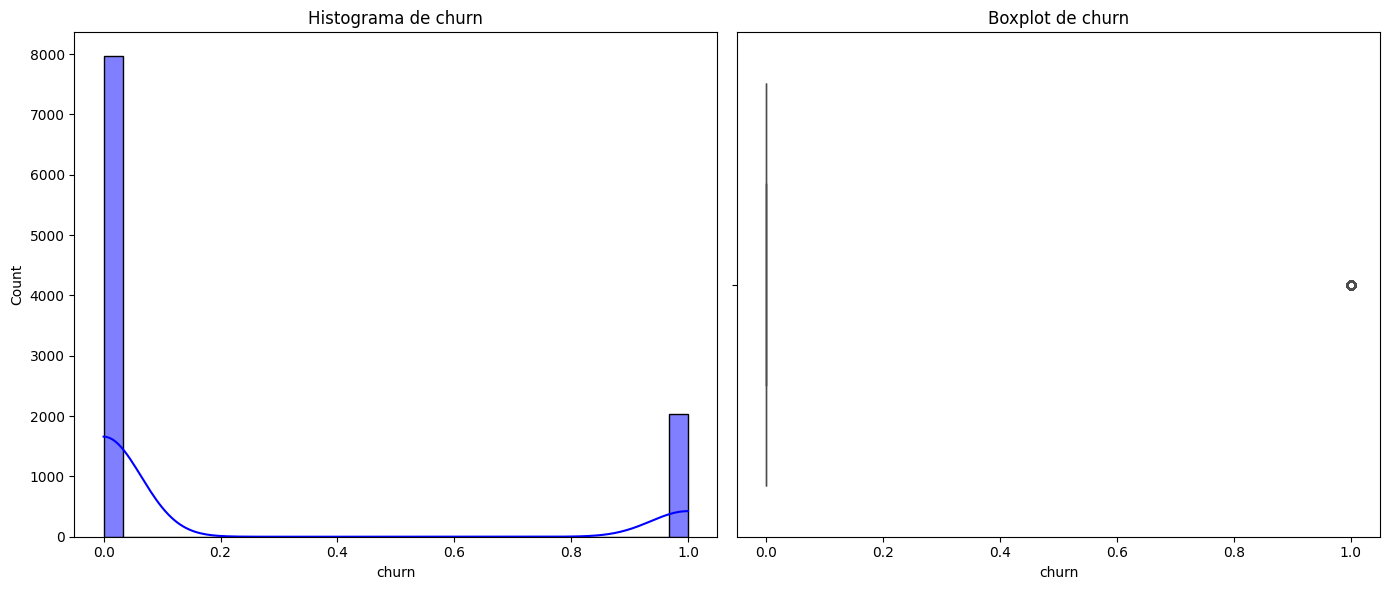

In [15]:
# Criar histogramas e boxplots para cada variável numérica
for var in variaveis_numericas:
    plt.figure(figsize=(14, 6))

    # Subplot para o histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True, bins=30, color='blue')
    plt.title(f'Histograma de {var}')

    # Subplot para o boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[var], color='orange')
    plt.title(f'Boxplot de {var}')

    plt.tight_layout()  # Ajusta o layout para evitar sobreposição
    plt.show()


### Desafio 4:

Para utilizar os dados nos algoritmos de Machine Learning, precisamos informar quais são as variáveis explicativas e qual é a variável alvo. Neste desafio, faça a separação da base de dados de churn entre as variáveis explicativas, armazenando em uma variável x e a variável alvo em y.


In [16]:
# Separar variáveis explicativas e variável alvo
X = df.drop(columns='churn')
y = df['churn']

print("\nVariáveis explicativas (X):")
print(X.head())

print("\nVariável alvo (y):")
print(y.head())


Variáveis explicativas (X):
   id_cliente  score_credito     pais sexo_biologico  idade  anos_de_cliente  \
0    15634602            619   França         Mulher     42                2   
1    15647311            608  Espanha         Mulher     41                1   
2    15619304            502   França         Mulher     42                8   
3    15701354            699   França         Mulher     39                1   
4    15737888            850  Espanha         Mulher     43                2   

       saldo  servicos_adquiridos  tem_cartao_credito  membro_ativo  \
0       0.00                    1                   1             1   
1   83807.86                    1                   0             1   
2  159660.80                    3                   1             0   
3       0.00                    2                   0             0   
4  125510.82                    1                   1             1   

   salario_estimado  
0         101348.88  
1         112542.58

### Desafio 5:

Variáveis categóricas que estejam em formato de texto não podem ser utilizadas diretamente nos modelos de Machine Learning. Neste desafio, faça a transformação das variáveis categóricas para formato numérico usando o [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), utilizando o parâmetro `drop='if_binary'` caso alguma variável tenha apenas 2 categorias.

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identificar variáveis categóricas
variaveis_categoricas = X.select_dtypes(include=['object']).columns.tolist()

# Identificar variáveis numéricas
variaveis_numericas = X.select_dtypes(include=['number']).columns.tolist()

print("\nVariáveis categóricas:")
print(variaveis_categoricas)

print("\nVariáveis numéricas:")
print(variaveis_numericas)


# Criar o pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='if_binary', sparse=False), variaveis_categoricas),
        ('num', 'passthrough', variaveis_numericas)
    ]
)

# Aplicar o pré-processador
X_transformed = preprocessor.fit_transform(X)

# Verificar o resultado da transformação
print("\nPrimeiras linhas dos dados transformados:")
print(pd.DataFrame(X_transformed).head())



Variáveis categóricas:
['pais', 'sexo_biologico']

Variáveis numéricas:
['id_cliente', 'score_credito', 'idade', 'anos_de_cliente', 'saldo', 'servicos_adquiridos', 'tem_cartao_credito', 'membro_ativo', 'salario_estimado']

Primeiras linhas dos dados transformados:
    0    1    2    3           4      5     6    7          8    9    10   11  \
0  0.0  0.0  1.0  1.0  15634602.0  619.0  42.0  2.0       0.00  1.0  1.0  1.0   
1  0.0  1.0  0.0  1.0  15647311.0  608.0  41.0  1.0   83807.86  1.0  0.0  1.0   
2  0.0  0.0  1.0  1.0  15619304.0  502.0  42.0  8.0  159660.80  3.0  1.0  0.0   
3  0.0  0.0  1.0  1.0  15701354.0  699.0  39.0  1.0       0.00  2.0  0.0  0.0   
4  0.0  1.0  0.0  1.0  15737888.0  850.0  43.0  2.0  125510.82  1.0  1.0  1.0   

          12  
0  101348.88  
1  112542.58  
2  113931.57  
3   93826.63  
4   79084.10  


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Desafio 6:

A variável alvo, como é do tipo categórica, também precisa passar por um tratamento similar às variáveis explicativas categóricas para que possa ser usada nos algoritmos. Nessa tarefa, utilize o método [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) para fazer a transformação da variável churn.

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Criar e aplicar o pré-processador para variáveis explicativas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='if_binary', sparse=False), variaveis_categoricas),
        ('num', 'passthrough', variaveis_numericas)
    ]
)

X_transformed = preprocessor.fit_transform(X)

# Criar e aplicar o LabelEncoder para a variável alvo
label_encoder = LabelEncoder()
y_transformed = label_encoder.fit_transform(y)

print("\nPrimeiras linhas dos dados transformados (X):")
print(pd.DataFrame(X_transformed).head())

print("\nPrimeiras linhas da variável alvo transformada (y):")
print(y_transformed[:5])



Primeiras linhas dos dados transformados (X):
    0    1    2    3           4      5     6    7          8    9    10   11  \
0  0.0  0.0  1.0  1.0  15634602.0  619.0  42.0  2.0       0.00  1.0  1.0  1.0   
1  0.0  1.0  0.0  1.0  15647311.0  608.0  41.0  1.0   83807.86  1.0  0.0  1.0   
2  0.0  0.0  1.0  1.0  15619304.0  502.0  42.0  8.0  159660.80  3.0  1.0  0.0   
3  0.0  0.0  1.0  1.0  15701354.0  699.0  39.0  1.0       0.00  2.0  0.0  0.0   
4  0.0  1.0  0.0  1.0  15737888.0  850.0  43.0  2.0  125510.82  1.0  1.0  1.0   

          12  
0  101348.88  
1  112542.58  
2  113931.57  
3   93826.63  
4   79084.10  

Primeiras linhas da variável alvo transformada (y):
[1 0 1 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Desafio 7:

A separação dos dados entre conjunto de treinamento e teste é essencial para compreender se um modelo está conseguindo aprender os padrões e generalizar para novos dados. Nesta tarefa, faça a divisão da base de dados entre treinamento e teste de forma estratificada.

In [26]:
#Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y_transformed, test_size=0.3, random_state=42, stratify=y_transformed
)

print("\nDados de treinamento e teste:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Verificar a distribuição das classes nos conjuntos de treinamento e teste
def exibir_distribuicao_porcentagem(y):
    distribuicao = pd.Series(y).value_counts(normalize=True) * 100
    return distribuicao.round(2)

print("\nDistribuição das classes na variável alvo nos dados de treinamento:")
print(exibir_distribuicao_porcentagem(y_train))

print("\nDistribuição das classes na variável alvo nos dados de teste:")
print(exibir_distribuicao_porcentagem(y_test))



Dados de treinamento e teste:
X_train shape: (7000, 13)
X_test shape: (3000, 13)
y_train shape: (7000,)
y_test shape: (3000,)

Distribuição das classes na variável alvo nos dados de treinamento:
0    79.63
1    20.37
Name: proportion, dtype: float64

Distribuição das classes na variável alvo nos dados de teste:
0    79.63
1    20.37
Name: proportion, dtype: float64


### Desafio 8:

Um modelo de base é muito importante para definir um critério de comparação para modelos mais complexos. Nesta etapa, crie um modelo de base com o `DummyClassifier` e encontre a taxa de acerto com o método `score`.

In [31]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Criar o DummyClassifier
# A estratégia 'most_frequent' usa a classe mais frequente para previsões
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)

# Treinar o modelo com os dados de treinamento
dummy_clf.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = dummy_clf.predict(X_test)

# Calcular a taxa de acerto (precisão)
accuracy = dummy_clf.score(X_test, y_test) * 100

print(f"\nTaxa de acerto do DummyClassifier: {accuracy:.2f}%")



Taxa de acerto do DummyClassifier: 79.63%


### Desafio 9:

A árvore de decisão é um algoritmo que faz as classificações a partir de decisões simples tomadas a partir dos dados. Temos que tomar certo cuidado para não utilizar uma profundidade muito grande, porque isso pode provocar um sobreajuste do modelo aos dados de treinamento. Neste desafio, crie um modelo de árvore de decisão com o parâmetro `max_depth=4`, avalie o desempenho do modelo nos dados de teste e visualize as decisões da árvore usando o método `plot_tree`.

In [34]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Criar o modelo de árvore de decisão com profundidade máxima de 4
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)

# Treinar o modelo com os dados de treinamento
tree_clf.fit(X_train, y_train)

# Avaliar o desempenho do modelo nos dados de teste
accuracy = tree_clf.score(X_test, y_test)

# Converter a taxa de acerto para porcentagem
accuracy_percentage = accuracy * 100

print(f"\nTaxa de acerto do DecisionTreeClassifier: {accuracy_percentage:.2f}%")



Taxa de acerto do DecisionTreeClassifier: 85.47%


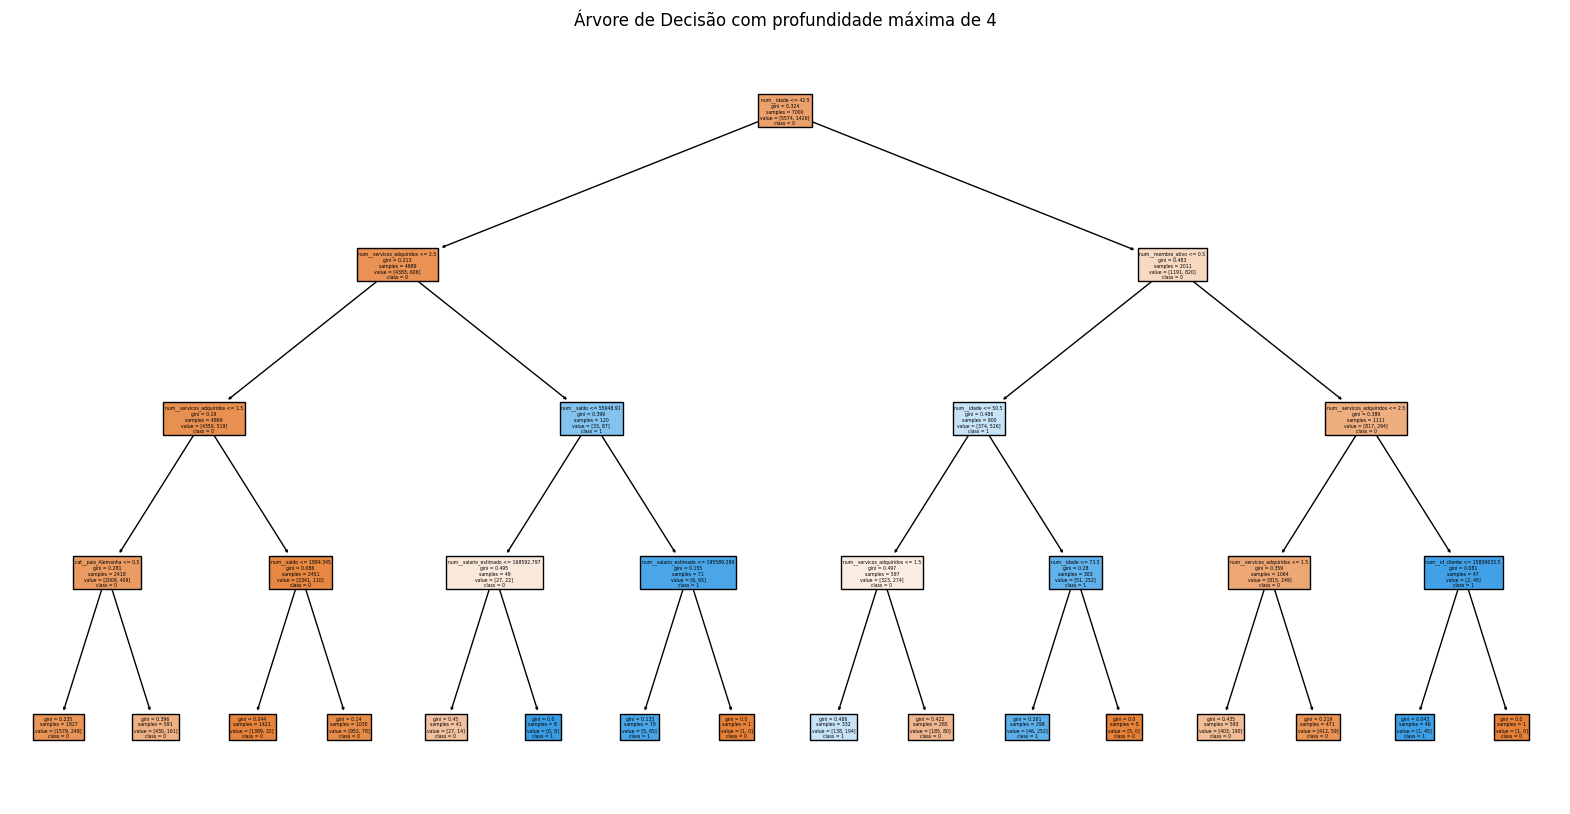

In [36]:
# Visualizar a árvore de decisão
plt.figure(figsize=(20, 10))
# Convert class names to strings
class_names_str = [str(c) for c in label_encoder.classes_]
plot_tree(tree_clf, feature_names=preprocessor.get_feature_names_out(),
          class_names=class_names_str, filled=True)  # Use string class names
plt.title('Árvore de Decisão com profundidade máxima de 4')
plt.show()

### Desafio 10:

A normalização de dados é uma tarefa importante para manter todos os valores numéricos em uma mesma escala e garantir que todas as características tenham o mesmo impacto no modelo. Nesta tarefa, faça a normalização da base de dados usando o [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).


In [37]:
#Aplicar o pré-processador nos dados
X_transformed = preprocessor.fit_transform(X)

# Dividir os dados transformados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y_transformed, test_size=0.3, random_state=42, stratify=y_transformed
)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Desafio 11:

Com os dados normalizados, podemos utilizar o modelo KNN, que faz cálculos de distância para encontrar os vizinhos mais próximos. Nesta atividade, crie um modelo KNN usando o [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) com os dados normalizados e avalie o desempenho nos dados de teste, também normalizados.

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Criar o modelo KNN com um número de vizinhos (k) de 5 (você pode ajustar o valor de k se necessário)
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Treinar o modelo com os dados de treinamento normalizados
knn_clf.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste normalizado
y_pred = knn_clf.predict(X_test)

# Calcular a taxa de acerto (precisão)
accuracy = accuracy_score(y_test, y_pred)

# Converter a taxa de acerto para porcentagem
accuracy_percentage = accuracy * 100

print(f"\nTaxa de acerto do KNeighborsClassifier: {accuracy_percentage:.2f}%")



Taxa de acerto do KNeighborsClassifier: 75.87%


### Desafio 12:

Após a construção dos modelos, é o momento de comparar os resultados e selecionar aquele que tem o melhor desempenho. Neste desafio, avalie a taxa de acerto dos modelos `DummyClassifier`, `DecisionTreeClassifier` e `KNeighborsClassifier` que foram construídos nos outros desafios utilizando o método `score` e depois armazene o modelo com melhor acurácia em um arquivo `pickle`. Os modelos de transformação também precisam ser armazenados, que é o caso do `OneHotEncoder` e do `MinMaxScaler`, caso o KNN tenha o melhor desempenho.

In [39]:
import pickle

# Avaliar a taxa de acerto do DummyClassifier
dummy_accuracy = dummy_clf.score(X_test, y_test)
dummy_accuracy_percentage = dummy_accuracy * 100

# Avaliar a taxa de acerto do DecisionTreeClassifier
tree_accuracy = tree_clf.score(X_test, y_test)
tree_accuracy_percentage = tree_accuracy * 100

# Avaliar a taxa de acerto do KNeighborsClassifier
knn_accuracy = knn_clf.score(X_test, y_test)
knn_accuracy_percentage = knn_accuracy * 100

# Exibir as taxas de acerto
print(f"Taxa de acerto do DummyClassifier: {dummy_accuracy_percentage:.2f}%")
print(f"Taxa de acerto do DecisionTreeClassifier: {tree_accuracy_percentage:.2f}%")
print(f"Taxa de acerto do KNeighborsClassifier: {knn_accuracy_percentage:.2f}%")

# Identificar o melhor modelo
model_scores = {
    'DummyClassifier': dummy_accuracy_percentage,
    'DecisionTreeClassifier': tree_accuracy_percentage,
    'KNeighborsClassifier': knn_accuracy_percentage
}

best_model_name = max(model_scores, key=model_scores.get)
best_model_accuracy = model_scores[best_model_name]

print(f"\nO melhor modelo é o {best_model_name} com uma taxa de acerto de {best_model_accuracy:.2f}%")


Taxa de acerto do DummyClassifier: 79.63%
Taxa de acerto do DecisionTreeClassifier: 85.47%
Taxa de acerto do KNeighborsClassifier: 75.87%

O melhor modelo é o DecisionTreeClassifier com uma taxa de acerto de 85.47%


### Desafio 13:

Depois que o modelo está em produção, já pode ser utilizado para classificar novos dados. Neste desafio, faça a leitura dos arquivos `pickle` dos modelos que foram salvos no desafio anterior e utilize os modelos para fazer a previsão do seguinte registro:

```
novo_dado = pd.DataFrame({
    'score_credito': [850],
    'pais':['França'],
    'sexo_biologico':['Homem'],
    'idade': [27],
    'anos_de_cliente': [3],
    'saldo': [56000],
    'servicos_adquiridos': [1],
    'tem_cartao_credito': ['sim'],
    'membro_ativo': ['sim'],
    'salario_estimado': [85270.00]
})
```
